# GoBike dataset exploration
## by Abdulaziz Alhuzaymi

## Investigation Overview

> In this notebook I will assess, clean, and explore the GoBike dataset and make some visualizations, specifically, I'm focusing on knowing when do people use GoBike, and the proportions of ages, genders, and types of users.

## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

Import Libraries and read the csv file 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

# data wrangling

## 1- assesing

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
# number of rides that lasts more than 5 hours
df[df.duration_sec > 20000].shape[0]

215

In [7]:
df.duplicated().any()

False

In [8]:
# looking for empty values
df[df.start_station_id.isna()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes


In [9]:
df[df.member_birth_year.isna()].head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No


In [10]:
# looking for inconsistency the stations name
for i in df.start_station_id.unique():
    x = df[df.start_station_id == i].start_station_name.value_counts()
    if x.nunique() > 1:
        print('station: ', i, ' has more than one name')

### data quality issues:

- `start_time` and `end_time` are strings
- `start_station_id` and `end_station_id` are floats
- `user_type` is string
- `member_birth_year` is float
- `member_gender` is string
- `bike_share_for_all_trip` is string
- `bike_id` is int


- `start_station_id`, `start_station_name`, `end_station_id` and `end_station_name` have some missing values
- `member_birth_year` and `member_gender` have some missing values


## 2- data cleaning

In [11]:
# new copy for the clean version
df_clean = df.copy()

For the sake of making this section as short as possible, I will solve any realted issues in just one cell.

In [12]:
# dropping Nan values
df_clean.dropna(inplace=True, subset=['start_station_id'])
df_clean.dropna(inplace=True, subset=['member_birth_year'])

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [14]:
# changing data types

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

df_clean.start_station_id = df_clean.start_station_id.astype('int64').astype('str')
df_clean.end_station_id = df_clean.end_station_id.astype('int64').astype('str')
df_clean.bike_id = df_clean.bike_id.astype('str')

df_clean.member_birth_year = df_clean.member_birth_year.astype('int64')

df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [16]:
df_clean.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No


I will change the duration_sec column from seconds to minutes, since it's easier to understand

In [17]:
df_clean.rename(columns={'duration_sec': 'minutes'}, inplace=True)

In [18]:
df_clean.minutes = df_clean.minutes.apply(lambda x: x/60)

In [19]:
df_clean.minutes.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: minutes, dtype: float64

Finally, I will drop the unwanted columns.

In [20]:
col = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df_clean.drop(col, axis=1, inplace=True)

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   minutes                  174952 non-null  float64       
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  object        
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  object        
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(3), 

# Data exploration and visualization

## Univariate Exploration

> In this section, I will investigate distributions of individual variables, and take a deeper look to clean things up
and look at relationships between variables.

### Distribution of minutes

In [22]:
# defining the color pallete I will be using for the visualization
color = sb.color_palette("flare")

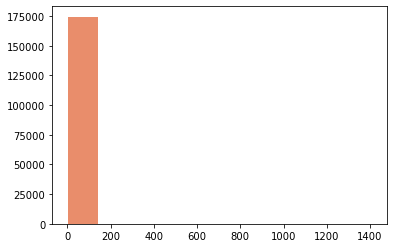

In [23]:
plt.hist(data=df_clean, x='minutes', color=color[0]);

It is clear that a normal histogram won't work here due to the high variance between the values, so log scaled histogram will come in handy.

In [24]:
# minutes scaled to log to use them in the chart
np.log10(df_clean.minutes.describe())

count    5.242919
mean     1.069423
std      1.437276
min      0.007179
25%      0.731051
50%      0.929419
75%      1.118926
max      3.148952
Name: minutes, dtype: float64

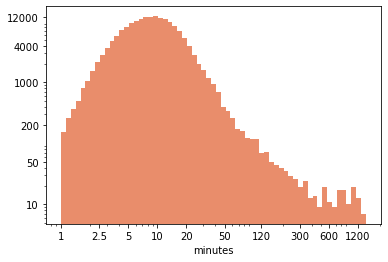

In [25]:
tbins = 10 ** np.arange(0.007179, 3.148952+0.05,0.05)
plt.hist(data=df_clean, x='minutes', bins=tbins, color=color[0]);
xticks = [1, 2.5, 5,10,20,50,120,300,600,1200]
yticks = [10,50,200,1000,4000,12000]
plt.xscale('log')
plt.yscale('log')
plt.xticks(xticks,xticks);
plt.yticks(yticks,yticks);
plt.xlabel('minutes');

we can still see a huge variety in the ditribution of minutes, therefore, I will devide them in 2 plots
- from 0 to 60 min (the majority of the data)
- from 60 min to the maximum

In [26]:
mask1 = df_clean[df_clean.minutes < 60]
mask2 = df_clean[df_clean.minutes > 60]

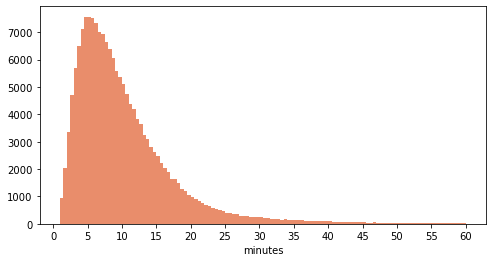

In [27]:
# normal histogram
plt.figure(figsize=(8,4))
xticks = range(0,60+1,5)
bins = np.arange(1, 60+0.5, 0.5)
plt.hist(data=mask1, x='minutes', bins=bins, color=color[0]);
plt.xticks(xticks,xticks);
plt.xlabel('minutes');

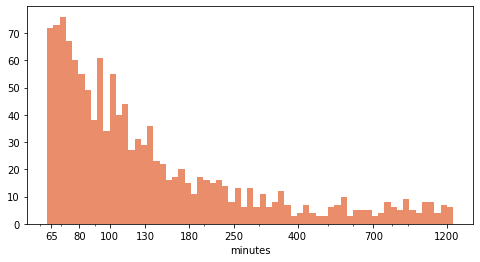

In [28]:
plt.figure(figsize=(8,4))
tbins = 10 ** np.arange(1.8, 3.1+0.02,0.02)
plt.hist(data=mask2, x='minutes', bins=tbins, color=color[0]);
xticks = [65,80,100,130,180,250,400,700,1200]
yticks = [10,50,200,1000,4000,12000]
plt.xscale('log')
plt.xticks(xticks,xticks);
plt.xlabel('minutes');

we can see both of the plots are right skeweed, meaning that: mode > median > mean

-----

### Distribution of ages

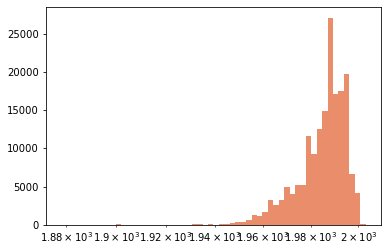

In [29]:
bins = np.arange(1880, 2001+2, 2)
tbins = 10 ** np.arange(3.273696, 3.301247+0.0005, 0.0005)
plt.hist(data=df_clean, x='member_birth_year', bins=tbins, color=color[0]);
plt.xscale('log')
#plt.xlim(1940)

even after the transformation, the chart is still not clear, so I will remove the outliers

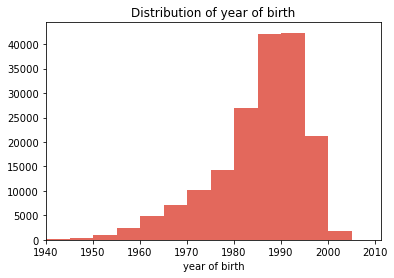

In [30]:
bins = np.arange(1880, 2001+5, 5)
color = sb.color_palette("flare")
plt.hist(data=df_clean, x='member_birth_year', bins=bins, color=color[1]);
plt.xlim(1940);
plt.title('Distribution of year of birth')
plt.xlabel('year of birth');

We can see that the major distribution of ages falls between 1985-1995.

-----

### Top 5 end and start stations

when plotting `start_station_id`, there is no way we can see the distribution of them all. so I will pick up the top frequently used stations to plot them.

In [31]:
tops = df_clean.start_station_name.value_counts()[:5]
tope = df_clean.end_station_name.value_counts()[:5]

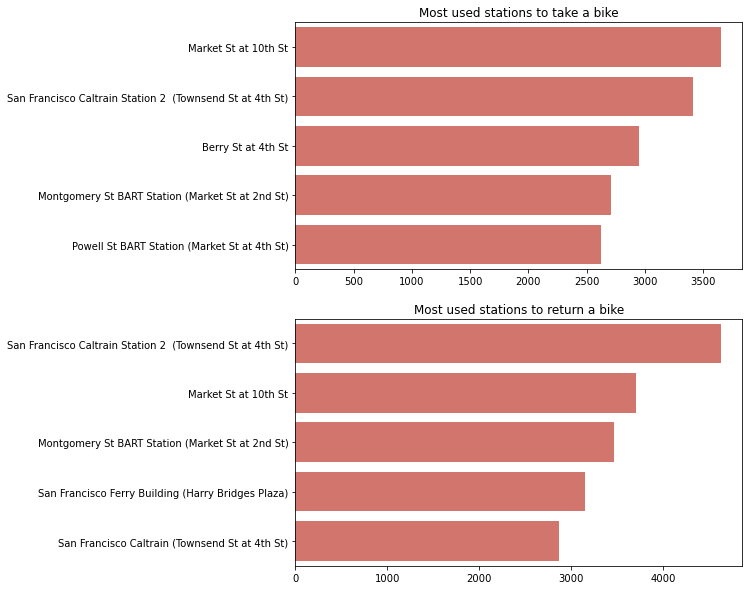

In [32]:
plt.figure(figsize=(8,10))
color = sb.color_palette("flare")
plt.subplot(2,1,1)
sb.countplot(data=df_clean, y='start_station_name', order=tops.index, color=color[1]);
plt.title('Most used stations to take a bike')
plt.ylabel('')
plt.xlabel('')

plt.subplot(2,1,2)
sb.countplot(data=df_clean, y='end_station_name', order=tope.index, color=color[1]);
plt.title('Most used stations to return a bike')
plt.ylabel('');
plt.xlabel('');

In the most used stations, there is a common stations showed in both when a person take a bike or return a bike.

-----

### Users type

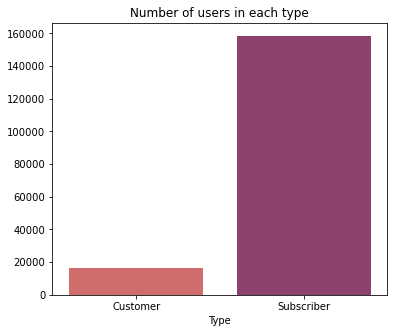

In [33]:
plt.figure(figsize=(6,5))
color = sb.color_palette("flare", n_colors=2)
sb.countplot(data=df_clean, x='user_type', palette=color);
plt.title('Number of users in each type')
plt.xlabel('Type')
plt.ylabel('');

The number of subscribers differs from the customers by a lot

---------

## Members gender

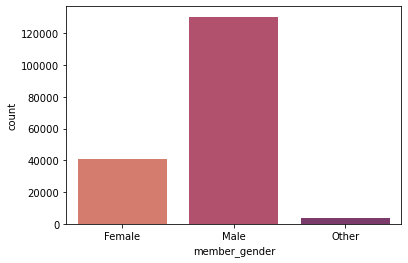

In [34]:
color = sb.color_palette("flare", n_colors=3)
sb.countplot(data=df_clean, x='member_gender', palette=color);

Males are the dominant here

-----

### Distribution of trips among hours of the day

I want to plot the start and end hours, so i thought extracting them into separte columns will be easier to deal with.

In [35]:
df_clean['start_hour'] = df_clean.start_time.astype('str').apply(lambda x: x[11:13])
df_clean['end_hour'] = df_clean.end_time.astype('str').apply(lambda x: x[11:13])

In [36]:
o = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = o)
df_clean['start_hour'] = df_clean['start_hour'].astype(ordered_var)
df_clean['end_hour'] = df_clean['end_hour'].astype(ordered_var)

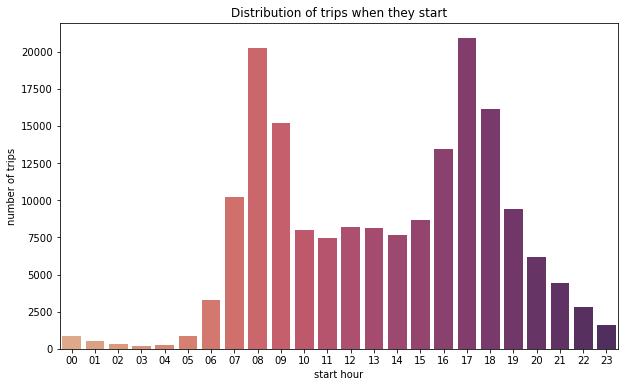

In [37]:
fig = plt.figure(figsize=(10,6))
sb.countplot(data=df_clean, x='start_hour', palette=sb.color_palette("flare", n_colors=24));
plt.title('Distribution of trips when they start')
plt.xlabel('start hour')
plt.ylabel('number of trips');

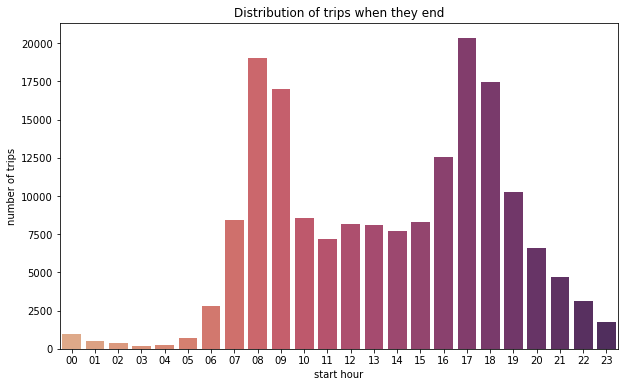

In [38]:
fig = plt.figure(figsize=(10,6))
sb.countplot(data=df_clean, x='end_hour', palette=sb.color_palette("flare", n_colors=24));
plt.title('Distribution of trips when they end')
plt.xlabel('start hour')
plt.ylabel('number of trips');

we can see a very interesting pattern here, both start and end hours aproxemetly have the same plot, which is weird!
but I think this is due to the fact that 75% of the people use the bike for 13 minutes only, which means most of the time it will be already placed back in the same hour.

In [39]:
nine_num = df_clean.query('minutes <= 30').shape[0]
all_num = df_clean.shape[0]
nine_num / all_num

0.965607709543189

as we can see 96.5% use the bike for <b>30min</b> or less, 

-----

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data.

### Ages & Minutes

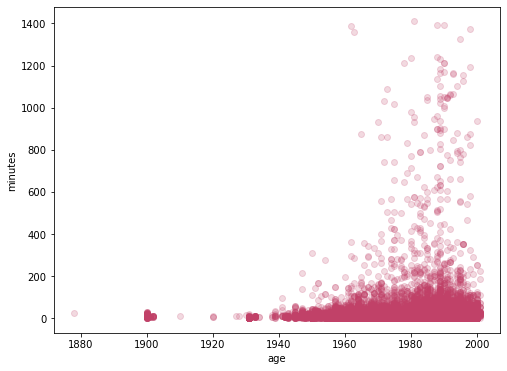

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(data=df_clean, x='member_birth_year', y='minutes', alpha=0.2, color=color[1]);
plt.ylabel('minutes');
plt.xlabel('age');

hard to gain anything from such a graph, so I will scale both axes and make the dots more transparent

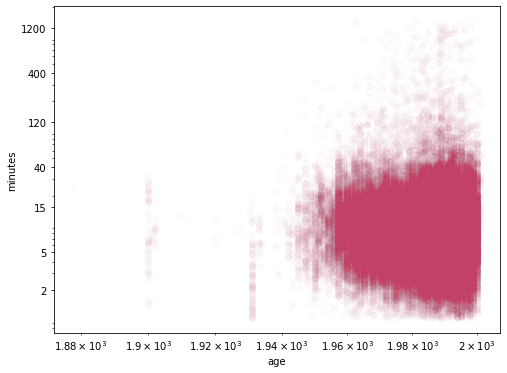

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(data=df_clean, x='member_birth_year', y='minutes', alpha=0.02, color=color[1]);
plt.xscale('log')
plt.yscale('log')
yticks = [2,5,15,40,120,400,1200]
plt.yticks(yticks,yticks);
plt.ylabel('minutes');
plt.xlabel('age');

we can see that the younger the person, the longer the ride is. which is normal and expected <br>
(note: I couldn't change the age ticks, but since the chart is not for a presentation we can stick with that)

-----

### Gender & Minutes

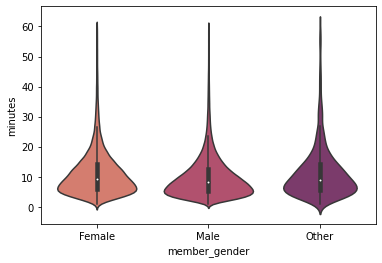

In [42]:
mask = df_clean.query('minutes < 60')
sb.violinplot(data=mask, x='member_gender', y='minutes', palette='flare');

-----

### User type & Minutes

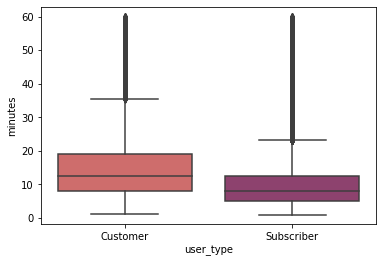

In [43]:
sb.boxplot(data=mask, x='user_type', y='minutes', palette='flare');

customers tend to have longer trips

-----

### User type & Gender

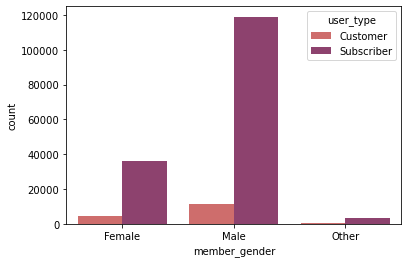

In [44]:
sb.countplot(data=df_clean, x='member_gender', hue='user_type', palette='flare');

as we saw before, males are much more than females, and that explains the difference between them in this chart

-----

### Minutes & start / end hours

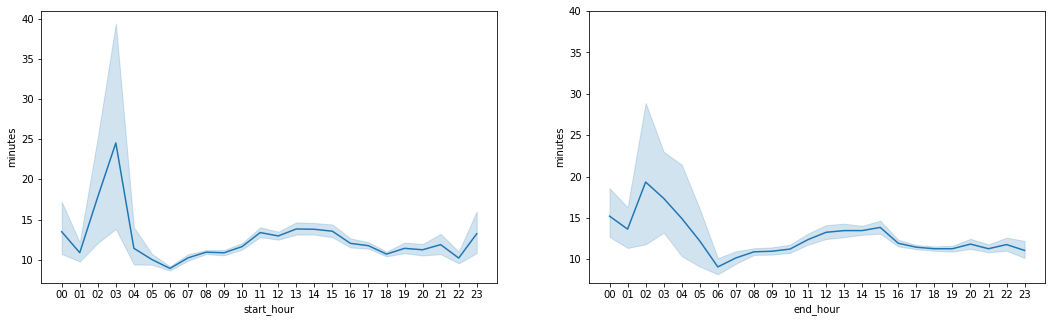

In [45]:
plt.figure(figsize=(18,5))
yticks = [10,15,20,25,30,35,40]

plt.subplot(1,2,1)
sb.lineplot(data=df_clean, x='start_hour', y='minutes');
plt.yticks(yticks,yticks);

plt.subplot(1,2,2)
sb.lineplot(data=df_clean, x='end_hour', y='minutes');
plt.yticks(yticks,yticks);

-----

## Multivariate Exploration

> In this section, I will investigate data with 3 or more variables.

### Gender - Age - Minutes

C:\Users\aziz\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


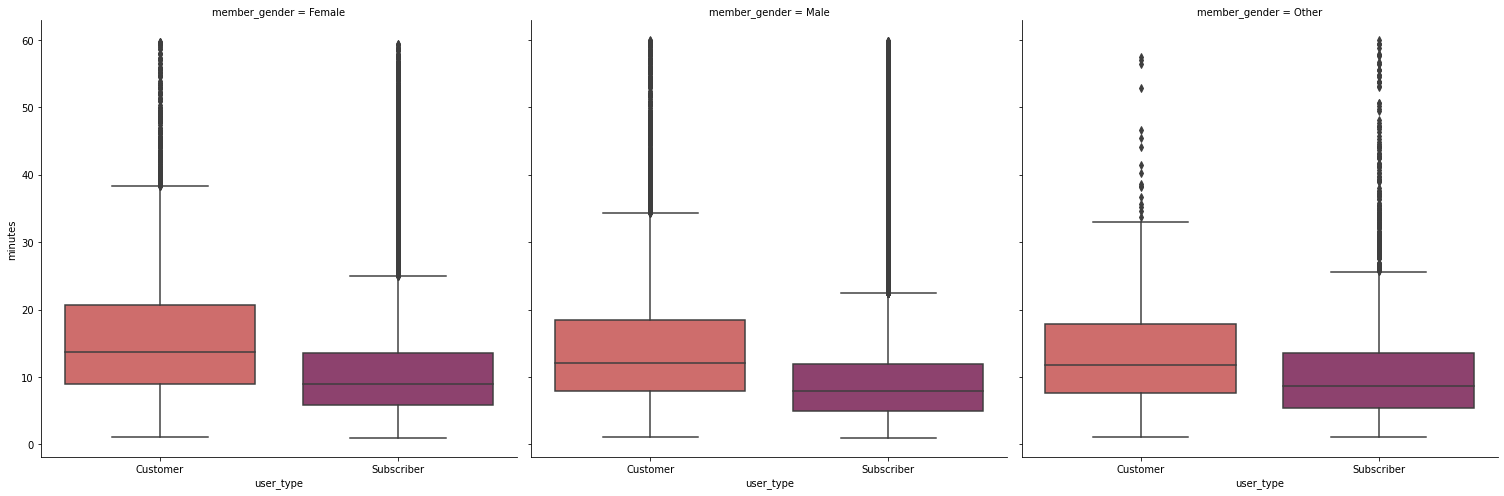

In [46]:
mask2 = mask.query('member_birth_year > 1960')
f = sb.FacetGrid(data=mask2, col='member_gender', height=7)
f.map(sb.boxplot, 'user_type', 'minutes', palette='flare')
#plt.xscale('log')
#plt.scatter(data=df_clean, x='member_birth_year', y='minutes', cmap='user_type')

-----

## Duration of usage in each hour for each type

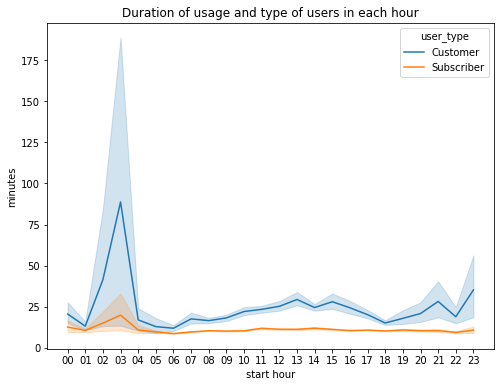

In [47]:
plt.figure(figsize=(8,6))
sb.lineplot(data=df_clean, x='start_hour', y='minutes', hue='user_type');
plt.title('Duration of usage and type of users in each hour')
plt.xlabel('start hour');

The line plot shows the difference in usage durations between Customers and Subscribers
One of the reasons I might think of is that subscribers often use the service to reach a specific place, like work, on the other hand, customers have no specific fixed destination, therefore they spend more time. And there is an interesting peak in terms of duration, from 1-4, and I can't think of a reason for that, or it maybe an outliers causing the line to go up

-----

## Duration of usage in each hour for each type and gender

C:\Users\aziz\AppData\Local\Temp/ipykernel_4712/3423541200.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mf.member_gender = mf.member_gender.astype('str')


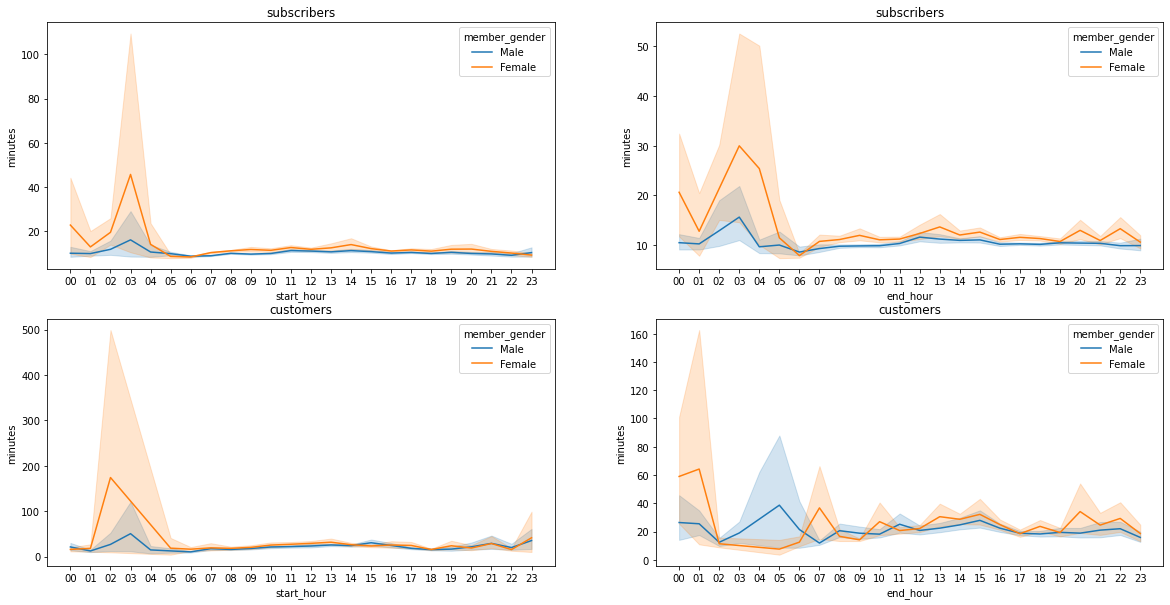

In [48]:
mf = df_clean.copy()
mf.member_gender = mf.member_gender.astype('str')
mf = df_clean.query('member_gender != "Other"')
mf.member_gender = mf.member_gender.astype('str')
sub = mf.query('user_type == "Subscriber"')
cus = mf.query('user_type == "Customer"')
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sb.lineplot(data=sub, x='start_hour', y='minutes', hue='member_gender');
plt.title('subscribers')

plt.subplot(2,2,2)
sb.lineplot(data=sub, x='end_hour', y='minutes', hue='member_gender');
plt.title('subscribers')

plt.subplot(2,2,3)
sb.lineplot(data=cus, x='start_hour', y='minutes', hue='member_gender');
plt.title('customers')

plt.subplot(2,2,4)
sb.lineplot(data=cus, x='end_hour', y='minutes', hue='member_gender');
plt.title('customers');

And there is an interesting peak in terms of duration, from 1-4, and I can't think of a reason for that. In addition to the difference between male and female in the customers - end hour plot, which is also unknown for the moment ad further and deeper investigation may reveal the patterns and the potential reasons

-----

## Duration of usage in each hour for genders

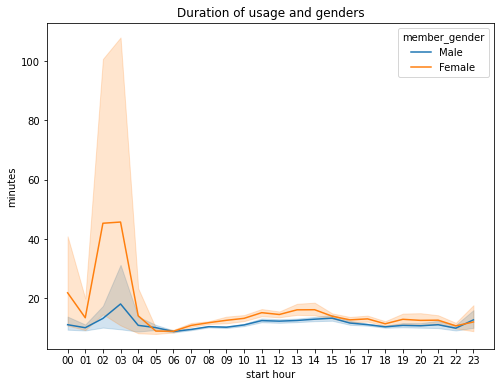

In [49]:
plt.figure(figsize=(8,6))
sb.lineplot(data=mf, x='start_hour', y='minutes', hue='member_gender');
plt.title('Duration of usage and genders')
plt.xlabel('start hour');

In addition to the same peak we saw earlier, there is a slight difference between males and females, regardless of the peak, females usually spend a little more time than the males do. But I think outliers play a role here, so let's dig deeper

-----

#### one last thing

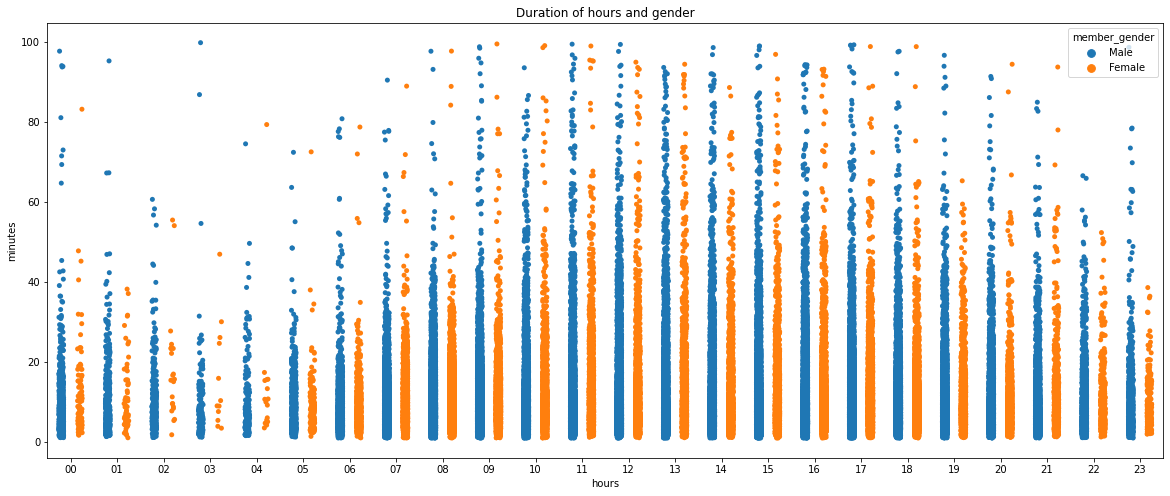

In [50]:
plt.figure(figsize=(20,8))
sb.stripplot(data=mf[mf.minutes < 100], x='start_hour', y='minutes', hue='member_gender', dodge=True)
plt.title('Duration of hours and gender')
plt.xlabel('hours');

as I expected, in the durations less than 40 female are much fewer than male (and that apply for the entire data) <br>
so the outliers in the female have more influence on the plot than the males

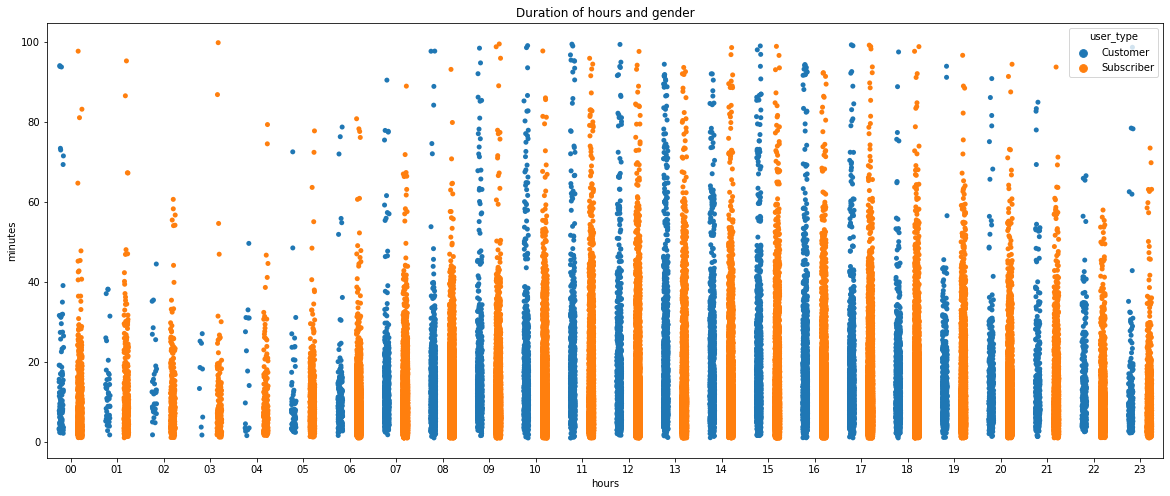

In [51]:
plt.figure(figsize=(20,8))
sb.stripplot(data=df_clean[df_clean.minutes < 100], x='start_hour', y='minutes', hue='user_type', dodge=True)
plt.title('Duration of hours and gender')
plt.xlabel('hours');

and the same thing applies for the chart where we plotted: minutes - start hours - user type <br>
So I think all of the line plots need outliers free data in order to see the true patterns, <br>
or we can focus on those outliers if they are the goal of the analysis

# Conclusion 
> this is the end of the notebook, some insights been dicovered and some still unknown until we dig deeper in the data to reveal them.
I hope you liked the work or helped you in some way, thank you.
<a herf=https://github.com/aziz-23>Github</a> - <a herf=linkedin.com/in/abdulaziz-alhuzaymi>Linkedin</a>